In [139]:
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image
import pandas as pd
import koreanize_matplotlib

In [104]:
EntDF = pd.read_excel('Enter_info.xlsx')

In [105]:
EntDF = EntDF[['회사','사업','직원수','기업구분','대졸초임','정규직 채용']]
EntDF

,회사,사업,직원수,기업구분,대졸초임,정규직 채용
0,넛지헬스케어㈜,모바일·APP,227명,벤처기업,NaN,100회
1,㈜코리아페이먼트,솔루션·SI·CRM·ERP,8명,중소기업,NaN,2회
2,㈜좋은정보기술,응용 소프트웨어 개발 및 공급업,15명,중소기업,NaN,51회
3,테크에스지㈜,기타 부동산 개발 및 공급업,5명,중소기업,NaN,7회
4,한국스마트정보교육원,기타 기술 및 직업훈련학원,4명,중소기업,NaN,8회
...,...,...,...,...,...,...
365,㈜다올피플,응용 소프트웨어 개발 및 공급업,2명,중소기업,NaN,1회
366,㈜마켓트리,모바일·APP,20명,중소기업,"3,900만원",72회
367,㈜포캐스크이엔엠(PoCask E&M),광고 대행업,15명,중소기업,NaN,21회
368,인포뱅크(주),그 외 기타 정보 서비스업,181명,중견기업,"4,100만원",122회


In [226]:
EntDF.count()

회사        370
사업        370
직원수       370
기업구분      370
대졸초임      145
정규직 채용    370
dtype: int64

### 대졸초임ㄴ

In [106]:
univerDF = EntDF

In [107]:
univerDF = univerDF.dropna()# 145개로 줄어들었다.

In [108]:
univerDF

,회사,사업,직원수,기업구분,대졸초임,정규직 채용
5,코아아이티,컴퓨터·하드웨어·장비,101명,중소기업,"2,950만원",127회
11,㈜메가젠임플란트,제약·보건·바이오,730명,중견기업,"4,200만원",219회
13,㈜보인정보기술,솔루션·SI·CRM·ERP,55명,중소기업,"3,000만원",78회
17,오아㈜,생활용품·소비재·기타,124명,중소기업,"3,000만원",42회
20,㈜텐노드솔루션,응용 소프트웨어 개발 및 공급업,55명,중소기업,"3,650만원",8회
...,...,...,...,...,...,...
359,㈜티모넷,솔루션·SI·CRM·ERP,84명,벤처기업,"3,400만원",173회
364,(주)클릭인포,솔루션·SI·CRM·ERP,18명,중소기업,"2,960만원",38회
366,㈜마켓트리,모바일·APP,20명,중소기업,"3,900만원",72회
368,인포뱅크(주),그 외 기타 정보 서비스업,181명,중견기업,"4,100만원",122회


In [109]:
univerDF['대졸초임'] = univerDF['대졸초임'].str.replace('만원','')
univerDF['대졸초임']  = univerDF['대졸초임'].str.replace(',','')

C:\Users\kjy19\AppData\Local\Temp\ipykernel_18684\3185876476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univerDF['대졸초임'] = univerDF['대졸초임'].str.replace('만원','')
C:\Users\kjy19\AppData\Local\Temp\ipykernel_18684\3185876476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univerDF['대졸초임']  = univerDF['대졸초임'].str.replace(',','')


In [110]:
univerDF['대졸초임'] = univerDF['대졸초임'].astype('int64')

C:\Users\kjy19\AppData\Local\Temp\ipykernel_18684\326462144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univerDF['대졸초임'] = univerDF['대졸초임'].astype('int64')


In [111]:
univerDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 5 to 369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사      145 non-null    object
 1   사업      145 non-null    object
 2   직원수     145 non-null    object
 3   기업구분    145 non-null    object
 4   대졸초임    145 non-null    int64 
 5   정규직 채용  145 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.9+ KB


In [112]:
univerDF['대졸초임'].mean()

3399.151724137931

In [113]:
indus_per_coinDF = univerDF

### 기업 종류 대졸초임 분석

In [114]:
indus_per_coinDF

,회사,사업,직원수,기업구분,대졸초임,정규직 채용
5,코아아이티,컴퓨터·하드웨어·장비,101명,중소기업,2950,127회
11,㈜메가젠임플란트,제약·보건·바이오,730명,중견기업,4200,219회
13,㈜보인정보기술,솔루션·SI·CRM·ERP,55명,중소기업,3000,78회
17,오아㈜,생활용품·소비재·기타,124명,중소기업,3000,42회
20,㈜텐노드솔루션,응용 소프트웨어 개발 및 공급업,55명,중소기업,3650,8회
...,...,...,...,...,...,...
359,㈜티모넷,솔루션·SI·CRM·ERP,84명,벤처기업,3400,173회
364,(주)클릭인포,솔루션·SI·CRM·ERP,18명,중소기업,2960,38회
366,㈜마켓트리,모바일·APP,20명,중소기업,3900,72회
368,인포뱅크(주),그 외 기타 정보 서비스업,181명,중견기업,4100,122회


In [115]:
indus_per_coinDF['기업구분'].unique()

array(['중소기업', '중견기업', '벤처기업', '대기업 계열사·자회사', '외국계(외국 투자기업)', '대기업',
       '외국계(외국 법인기타)'], dtype=object)

In [134]:
중소기업 = round(indus_per_coinDF[indus_per_coinDF['기업구분']=='중소기업']['대졸초임'].mean())
중견기업 = round(indus_per_coinDF[indus_per_coinDF['기업구분']=='중견기업']['대졸초임'].mean())
벤처기업 = round(indus_per_coinDF[indus_per_coinDF['기업구분']=='벤처기업']['대졸초임'].mean())
대기업계열자회사 = round(indus_per_coinDF[indus_per_coinDF['기업구분']=='대기업 계열사·자회사']['대졸초임'].mean())
대기업 = round(indus_per_coinDF[indus_per_coinDF['기업구분']=='대기업']['대졸초임'].mean())
외국계 = round(indus_per_coinDF[(indus_per_coinDF['기업구분']=='외국계(외국 투자기업)') | (indus_per_coinDF['기업구분']=='외국계(외국 법인기타)')]['대졸초임'].mean())

In [143]:
indus_count_list = [
    indus_per_coinDF[indus_per_coinDF['기업구분']=='중소기업']['대졸초임'].count(),
    indus_per_coinDF[indus_per_coinDF['기업구분']=='중견기업']['대졸초임'].count(),
    indus_per_coinDF[indus_per_coinDF['기업구분']=='벤처기업']['대졸초임'].count(),
    indus_per_coinDF[indus_per_coinDF['기업구분']=='대기업 계열사·자회사']['대졸초임'].count(),
    indus_per_coinDF[indus_per_coinDF['기업구분']=='대기업']['대졸초임'].count(),
    indus_per_coinDF[(indus_per_coinDF['기업구분']=='외국계(외국 투자기업)') | (indus_per_coinDF['기업구분']=='외국계(외국 법인기타)')]['대졸초임'].count()
]
indus_count_list

[101, 16, 16, 4, 4, 4]

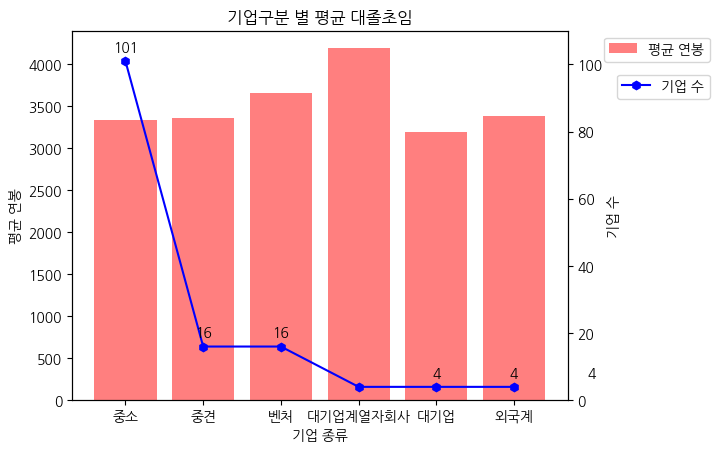

<Figure size 4000x800 with 0 Axes>

In [209]:
fig, ax1 = plt.subplots()
bars = ax1.bar(['중소', '중견', '벤처', '대기업계열자회사', '대기업', '외국계'], [중소기업, 중견기업, 벤처기업, 대기업계열자회사, 대기업, 외국계], color = 'red', alpha = 0.5)
ax2 = ax1.twinx()
lines = ax2.plot(['중소', '중견', '벤처', '대기업계열자회사', '대기업', '외국계'], indus_count_list, color = 'blue', alpha = 1, marker='h')

# ax1.legend(handles=bars, loc='upper left')
# ax1.legend(handles=bars, loc='upper left')
ax1.legend(['평균 연봉'], loc='upper right', bbox_to_anchor=(1.3, 1))
ax2.legend(['기업 수'], loc='upper right', bbox_to_anchor=(1.3, 0.9))
# plt.tight_layout()
# plt.legend('기업별 평균 연봉', '기업 수')
# ax1.text('')


# ax1.text([indus_count_list])

for i in range(len(['중소', '중견', '벤처', '대기업계열자회사', '대기업', '외국계'])):
    height = indus_count_list[i]
    plt.text(['중소', '중견', '벤처', '대기업계열,자회사', '대기업', '외국계'][i], height + 2, '%i' %height, ha='center', va='bottom', size = 10)

plt.title('기업구분 별 평균 대졸초임')
ax2.set_ylabel('기업 수')
ax1.set_ylabel('평균 연봉')
ax1.set_xlabel('기업 종류')
plt.ylim(0,110)
plt.figure(figsize=(40,8))
plt.show()

### 기업 유형

In [219]:
industryDF = EntDF 

In [263]:
industryDF

,회사,사업,직원수,기업구분,대졸초임,정규직 채용
0,넛지헬스케어㈜,모바일·APP,227명,벤처기업,NaN,100회
1,㈜코리아페이먼트,솔루션·SI·CRM·ERP,8명,중소기업,NaN,2회
2,㈜좋은정보기술,응용 소프트웨어 개발 및 공급업,15명,중소기업,NaN,51회
3,테크에스지㈜,기타 부동산 개발 및 공급업,5명,중소기업,NaN,7회
4,한국스마트정보교육원,기타 기술 및 직업훈련학원,4명,중소기업,NaN,8회
...,...,...,...,...,...,...
365,㈜다올피플,응용 소프트웨어 개발 및 공급업,2명,중소기업,NaN,1회
366,㈜마켓트리,모바일·APP,20명,중소기업,"3,900만원",72회
367,㈜포캐스크이엔엠(PoCask E&M),광고 대행업,15명,중소기업,NaN,21회
368,인포뱅크(주),그 외 기타 정보 서비스업,181명,중견기업,"4,100만원",122회


In [271]:
industryDF['기업구분'] = industryDF['기업구분'].str.replace('외국계(외국 투자기업)','외국계')
industryDF['기업구분'] = industryDF['기업구분'].str.replace('외국계(외국 법인기타)','외국계')


In [272]:
list(industryDF['기업구분'].unique())

['벤처기업', '중소기업', '중견기업', '대기업 계열사·자회사', '외국계', '대기업', '개인']

In [280]:
induslist = industryDF.groupby('기업구분').count()['회사']
induslist = induslist.sort_values()

In [281]:
induslist.index

Index(['개인', '대기업 계열사·자회사', '외국계', '대기업', '중견기업', '벤처기업', '중소기업'], dtype='object', name='기업구분')

In [283]:
industryDF.groupby('기업구분').count()['회사'].values

array([  1,   5,   4,  49,   4,  25, 282], dtype=int64)

In [286]:
induslist.values

array([  1,   4,   4,   5,  25,  49, 282], dtype=int64)

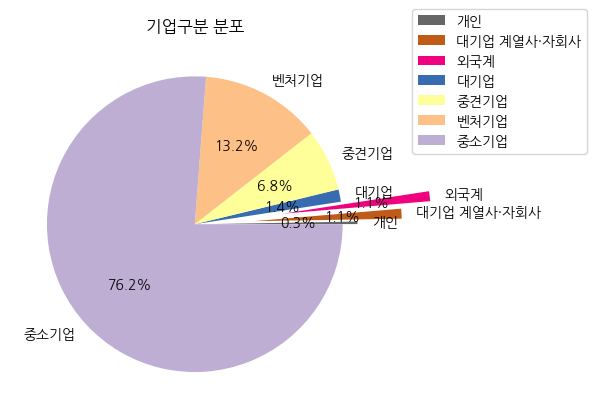

In [343]:
import matplotlib.cm as cm

explode = [0.1, 0.4, 0.6, 0.0, 0.0, 0.0, 0.0]
colors = cm.Accent_r(range(len(induslist)))
# color = ['lightcoral','orange','light blue', 'light yellow','yellow orange', 'red violet', 'sky']
plt.pie(list(induslist.values), labels=induslist.index,  autopct='%.1f%%', explode = explode, colors=colors)

plt.legend(loc='upper right', bbox_to_anchor=(1.58, 1.1))
plt.title('기업구분 분포')
plt.show()

### 정규직 채용

In [350]:
jungDF = EntDF

In [351]:
jungDF['정규직 채용'] = jungDF['정규직 채용'].str.replace('회', '')
jungDF

,회사,사업,직원수,기업구분,대졸초임,정규직 채용
0,넛지헬스케어㈜,모바일·APP,227명,벤처기업,NaN,100
1,㈜코리아페이먼트,솔루션·SI·CRM·ERP,8명,중소기업,NaN,2
2,㈜좋은정보기술,응용 소프트웨어 개발 및 공급업,15명,중소기업,NaN,51
3,테크에스지㈜,기타 부동산 개발 및 공급업,5명,중소기업,NaN,7
4,한국스마트정보교육원,기타 기술 및 직업훈련학원,4명,중소기업,NaN,8
...,...,...,...,...,...,...
365,㈜다올피플,응용 소프트웨어 개발 및 공급업,2명,중소기업,NaN,1
366,㈜마켓트리,모바일·APP,20명,중소기업,"3,900만원",72
367,㈜포캐스크이엔엠(PoCask E&M),광고 대행업,15명,중소기업,NaN,21
368,인포뱅크(주),그 외 기타 정보 서비스업,181명,중견기업,"4,100만원",122


In [366]:
jungDF['정규직 채용'] = jungDF['정규직 채용'].astype('int64')

In [367]:
jungDF['정규직 채용'].describe()

count     370.000000
mean       78.016216
std       222.315664
min         0.000000
25%        14.250000
50%        35.000000
75%        80.750000
max      3786.000000
Name: 정규직 채용, dtype: float64

In [ ]:
jungDF['정규직 채용']

In [368]:
jungtemp = jungDF['정규직 채용'].sort_values()

In [369]:
jungtemp[360:]

191     331
341     368
346     404
338     644
353     659
50      814
76      814
24      814
345     843
249    3786
Name: 정규직 채용, dtype: int64

### 산업 워드클라우드

In [371]:
indusWordDF = EntDF

In [376]:
wordlist = indusWordDF['사업'].to_list()

In [390]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image


okt = Okt()
sentences_tag = []

for sentence in wordlist:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

noun_adj_list = []

for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun']:
            noun_adj_list.append(word)


if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'

wordcloud = WordCloud(font_path=path, width=800, height=600, color_map='inferno',
                        background_color='White', max_font_size=200,
                        regexp=True)
# wordcloud(noun_adj_list)
cloud = wordcloud.generate_from_frequencies(noun_adj_list)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

AttributeError: 'list' object has no attribute 'items'

STOPWORDS :  {'who', "there's", 'otherwise', 'for', 'been', "you're", 'more', 'be', "he'll", 'had', "wouldn't", 'these', 'my', 'an', 'the', 'to', 'themselves', "isn't", 'where', 'than', 'from', 'few', "don't", 'before', 'being', 'just', 'all', 'shall', "hasn't", 'over', 'and', 'yours', 'doing', "i've", 'same', "hadn't", 'we', "he'd", 'what', "i'm", 'no', 'should', 'else', 'said', 'him', 'whom', 'was', 'out', 'like', 'would', 'in', "let's", 'k', 'yourselves', "aren't", 'do', "he's", 'his', "where's", 'as', 'each', 'but', 'r', 'our', "they'll", 'he', "she'll", "can't", 'above', 'why', 'further', 'com', "why's", 'could', 'through', 'having', 'a', 'her', "here's", 'into', "shouldn't", 'has', 'are', "it's", 'since', "i'll", 'theirs', 'himself', 'too', "they've", "we'd", 'of', 'most', 'or', "what's", "when's", 'until', 'were', 'also', 'this', 'some', 'does', 'yourself', 'nor', 'it', "mustn't", "how's", 'about', 'off', "shan't", 'get', "wasn't", 'ought', "they're", "she'd", "we've", 'very', '

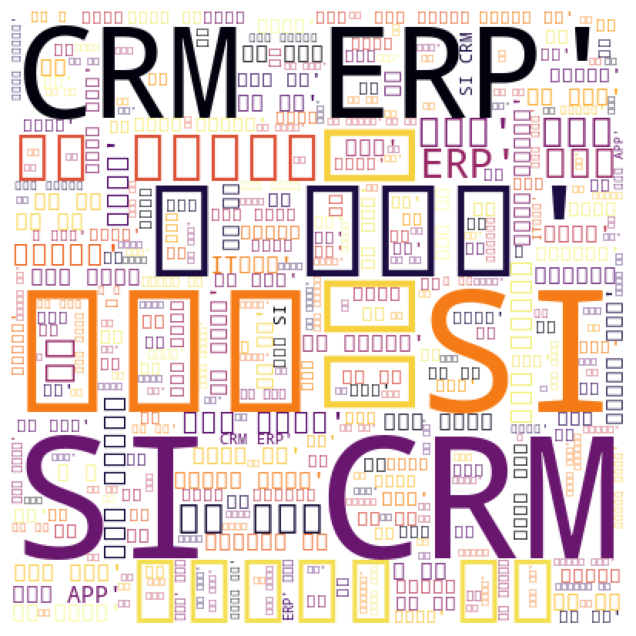

In [379]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from konlpy.tag import Okt

text = str(wordlist)
STOPWORDS.add('said')
# okt = Okt()
print('STOPWORDS : ', STOPWORDS)

# img_mask = np.array(Image.open('cloud.png'))

wordcloud = WordCloud(width=400, height=400, 
               background_color='White', max_font_size=200,
               stopwords=STOPWORDS,
               repeat=True, colormap='inferno').generate(text)
print(wordcloud.words_)

          
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [412]:
wordlist

['모바일·APP',
 '솔루션·SI·CRM·ERP',
 '응용 소프트웨어 개발 및 공급업',
 '기타 부동산 개발 및 공급업',
 '기타 기술 및 직업훈련학원',
 '컴퓨터·하드웨어·장비',
 '데이터베이스 및 온라인정보 제공업',
 '시스템 소프트웨어 개발 및 공급업',
 '시스템 소프트웨어 개발 및 공급업',
 '응용 소프트웨어 개발 및 공급업',
 '응용 소프트웨어 개발 및 공급업',
 '제약·보건·바이오',
 '기타 엔지니어링 서비스업',
 '솔루션·SI·CRM·ERP',
 'IT컨설팅',
 '기타 게임 소프트웨어 개발 및 공급업',
 '솔루션·SI·CRM·ERP',
 '생활용품·소비재·기타',
 '솔루션·SI·CRM·ERP',
 '웹에이전시',
 '응용 소프트웨어 개발 및 공급업',
 '솔루션·SI·CRM·ERP',
 '쇼핑몰·오픈마켓·소셜커머스',
 '응용 소프트웨어 개발 및 공급업',
 '지주회사',
 '시스템 소프트웨어 개발 및 공급업',
 '모바일·APP',
 '솔루션·SI·CRM·ERP',
 '응용 소프트웨어 개발 및 공급업',
 '기타 부동산 개발 및 공급업',
 '기타 기술 및 직업훈련학원',
 '컴퓨터·하드웨어·장비',
 '데이터베이스 및 온라인정보 제공업',
 '시스템 소프트웨어 개발 및 공급업',
 '시스템 소프트웨어 개발 및 공급업',
 '응용 소프트웨어 개발 및 공급업',
 '응용 소프트웨어 개발 및 공급업',
 '제약·보건·바이오',
 '기타 엔지니어링 서비스업',
 '솔루션·SI·CRM·ERP',
 'IT컨설팅',
 '기타 게임 소프트웨어 개발 및 공급업',
 '솔루션·SI·CRM·ERP',
 '생활용품·소비재·기타',
 '솔루션·SI·CRM·ERP',
 '웹에이전시',
 '응용 소프트웨어 개발 및 공급업',
 '솔루션·SI·CRM·ERP',
 '쇼핑몰·오픈마켓·소셜커머스',
 '응용 소프트웨어 개발 및 공급업',
 '지주회사',
 '시스템 소프트웨어 개발 및 공급업',
 '모바일·APP',
 '솔루션·SI·CRM·ERP',

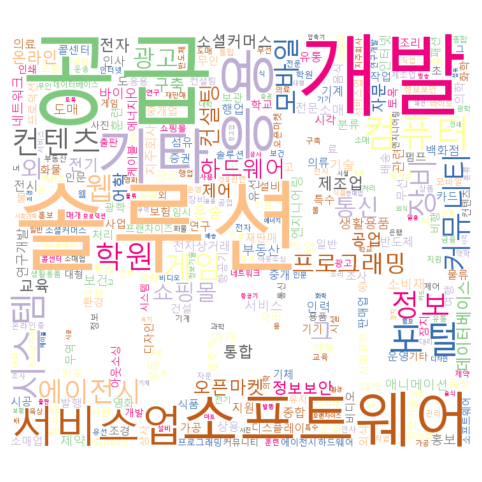

In [427]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

texts = wordlist

# Okt 형태소 분석기 생성
okt = Okt()

# 모든 문장에서 명사만 추출
nouns = []
for text in texts:
    for noun in okt.nouns(text):
        if noun not in ['업', '및']:  # 불용어 제거
            nouns.append(noun)  # 명사 추가
            # print(noun)

# 명사의 빈도수 계산
word_counts = Counter(nouns)
img_mask = np.array(Image.open('mysql.png'))
# WordCloud 생성
wordcloud = WordCloud(
    font_path=r'c:\Windows\Fonts\malgun.ttf',  # 한글 폰트 경로 설정 (필요시 경로 수정)
    background_color='white',
    colormap='Accent',
    width=800, repeat=True,
    height=400, mask=img_mask
).generate_from_frequencies(word_counts)

# 워드클라우드 출력
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

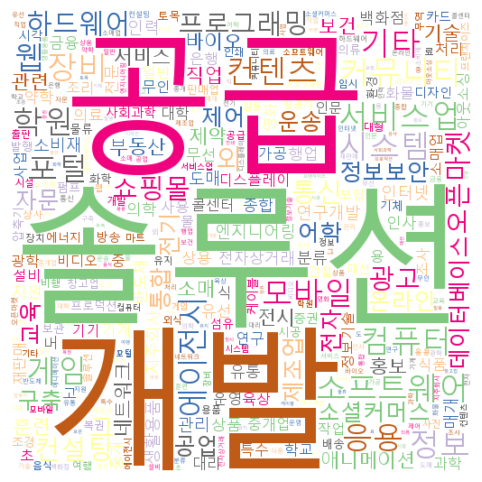

In [426]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

texts = wordlist

# Okt 형태소 분석기 생성
okt = Okt()

# 모든 문장에서 명사만 추출
nouns = []
for text in texts:
    for noun in okt.nouns(text):
        if noun not in ['업', '및']:  # 불용어 제거
            nouns.append(noun)  # 명사 추가
            # print(noun)

# 명사의 빈도수 계산
word_counts = Counter(nouns)
img_mask = np.array(Image.open('5954081.png'))
wordcloud = WordCloud(
    font_path=r'c:\Windows\Fonts\malgun.ttf',  # 한글 폰트 경로 설정 (필요시 경로 수정)
    background_color='white',
    colormap='Accent',
    width=800, repeat=True,
    height=400, mask=img_mask
).generate_from_frequencies(word_counts)

# 워드클라우드 출력
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [408]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 예제 텍스트 리스트

# wordcloud
# texts = [
#     "파이썬은 매우 유용한 프로그래밍 언어입니다.",
#     "데이터 분석을 위해 파이썬을 사용합니다.",
#     "파이썬을 사용하면 생산성을 크게 향상시킬 수 있습니다."
# ]

texts = wordlist

# Okt 형태소 분석기 생성
okt = Okt()

# 모든 문장에서 명사만 추출
nouns = []
for text in texts:
    if text != '업' or text != '및':
        nouns.extend(okt.nouns(text))
        # print(okt.nouns(text))
print(nouns)
# nouns = []
# for text in texts:
#     for i in okt.nouns(text):
#         if i not in ['업', '및']:
#             nouns.extend(i)
#             print(i)
#             # print(okt.nouns(text))


"""
# 명사의 빈도수 계산
word_counts = Counter(nouns)

# WordCloud 생성
wordcloud = WordCloud(
    font_path=r'c:\Windows\Fonts\malgun.ttf',  # 한글 폰트 경로 설정 (필요시 경로 수정)
    background_color='white',
    colormap='Accent',
    width=800,
    height=400
).generate_from_frequencies(word_counts)

# 워드클라우드 출력
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
"""

['모바일', '솔루션', '응용', '소프트웨어', '개발', '및', '공급', '업', '기타', '부동산', '개발', '및', '공급', '업', '기타', '기술', '및', '직업', '훈련', '학원', '컴퓨터', '하드웨어', '장비', '데이터베이스', '및', '온라인', '정보', '공업', '시스템', '소프트웨어', '개발', '및', '공급', '업', '시스템', '소프트웨어', '개발', '및', '공급', '업', '응용', '소프트웨어', '개발', '및', '공급', '업', '응용', '소프트웨어', '개발', '및', '공급', '업', '제약', '보건', '바이오', '기타', '엔지니어링', '서비스업', '솔루션', '컨설팅', '기타', '게임', '소프트웨어', '개발', '및', '공급', '업', '솔루션', '생활용품', '소비재', '기타', '솔루션', '웹', '에이전시', '응용', '소프트웨어', '개발', '및', '공급', '업', '솔루션', '쇼핑몰', '오픈마켓', '소셜커머스', '응용', '소프트웨어', '개발', '및', '공급', '업', '지주회사', '시스템', '소프트웨어', '개발', '및', '공급', '업', '모바일', '솔루션', '응용', '소프트웨어', '개발', '및', '공급', '업', '기타', '부동산', '개발', '및', '공급', '업', '기타', '기술', '및', '직업', '훈련', '학원', '컴퓨터', '하드웨어', '장비', '데이터베이스', '및', '온라인', '정보', '공업', '시스템', '소프트웨어', '개발', '및', '공급', '업', '시스템', '소프트웨어', '개발', '및', '공급', '업', '응용', '소프트웨어', '개발', '및', '공급', '업', '응용', '소프트웨어', '개발', '및', '공급', '업', '제약', '보건', '바이오', '기타', '엔지니어링', '서비스업', '솔루션', 

"\n# 명사의 빈도수 계산\nword_counts = Counter(nouns)\n\n# WordCloud 생성\nwordcloud = WordCloud(\n    font_path=r'c:\\Windows\\Fonts\\malgun.ttf',  # 한글 폰트 경로 설정 (필요시 경로 수정)\n    background_color='white',\n    colormap='Accent',\n    width=800,\n    height=400\n).generate_from_frequencies(word_counts)\n\n# 워드클라우드 출력\nplt.figure(figsize=(10, 6))\nplt.imshow(wordcloud, interpolation='bilinear')\nplt.axis('off')\nplt.show()\n"

### 정규직 고용